In [3]:
import cv2 as cv2
import cv2.aruco as aruco
import sys
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sympy import symbols, Eq, solve
import glob
import os

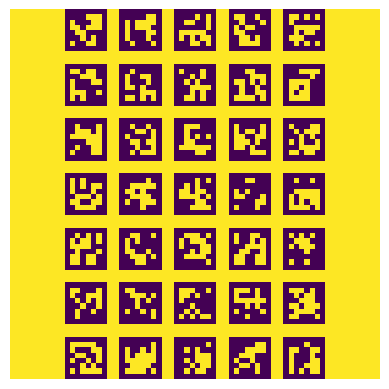

In [4]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_1000)


marker_length = 3.7
marker_seperation = 1.1

arucoParams = aruco.DetectorParameters_create()
board = aruco.GridBoard_create(5,7, marker_length, marker_seperation, aruco_dict)
imboard = board.draw((2000,2000))
#cv2.imwrite("aruco_board.png", imboard)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, interpolation= "nearest")
ax.axis("off")
plt.show()




In [8]:
counter, corners_list, id_list = [], [], []

first = 0

folder = "/Users/pavan/Downloads/OpenCV/qsn_3_aruco/arco_images"

for filename in os.listdir(folder) :
    img= cv2.imread(os.path.join(folder, filename))
    if img is not None:
        img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = aruco.detectMarkers(img_gray, aruco_dict, parameters=arucoParams)

    if first == 0:
        corners_list = corners
        id_list = ids

    else:
        corners_list = np.vstack((corners_list,corners))
        id_list = np.vstack((id_list,ids))
    
    first = first +1
    counter.append(len(ids))


counter = np.array(counter)
ret, mtx, dist, rvecs, tvecs = aruco.calibrateCameraAruco(corners_list, id_list, counter, board, img_gray.shape, None, None)

print("k matrix = " ,mtx)
print("distortion parameters = ", dist)

k matrix =  [[3.12450098e+03 0.00000000e+00 1.94671298e+03]
 [0.00000000e+00 3.12749901e+03 1.79778627e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion parameters =  [[-0.1193567   0.45348136  0.01090722  0.00685675 -0.47690137]]
